In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [14]:
tweets = pd.read_csv('./sample.csv')
tweets.head()

,Unnamed: 0,tweetcreatedts,text,emojis,tokens,nouns,adjectives,affect_list,affect_dict,affect_frequencies,...,fear,anger,anticipation,trust,surprise,sadness,disgust,joy,sentiment_score,sentiment
0,0,2022-04-01 00:00:00.000000,⚡The Ukrainian Air Force would like to address...,"['⚡', '🇺🇦', '🧵']","['⚡', 'ukrainian', 'air', 'force', 'would', 'l...","['⚡', 'air', 'force', 'misinformation', 'media...","['address', 'multiple', 'western', 'sky']","['anger', 'fear', 'trust', 'fear', 'anger', 'a...","{'force': ['anger', 'fear'], 'ally': ['trust']}","{'anger': 1.28, 'fear': 1.25, 'trust': 1.14000...",...,0,1,0,0,0,0,0,0,0.4404,Neutral
1,1,2022-04-01 00:00:00.000000,Chernihiv oblast. Ukrainians welcome their lib...,[],"['chernihiv', 'oblast', '.', 'ukrainian', 'wel...","['chernihiv', 'oblast', 'liberators', 'stopput...","['welcome', 'standwithukraine️', 'putinisawarc...",[],{},{},...,0,0,0,0,0,0,0,0,0.4588,Neutral
2,2,2022-04-01 00:00:00.000000,America 🇺🇸 is preparing for something worse th...,"['🇺🇸', '🇹🇼', '🇷🇺', '🇺🇸', '🇨🇳', '👇']","['america', '🇺', '🇸', 'preparing', 'something'...","['america', '🇺', '🇸', 'something', '🇹', '🇼', '...","['worse', 'taiwan', 'last', 'new', 'cold', 'be...","['fear', 'sadness', 'fear', 'trust', 'fear', '...","{'worse': ['fear', 'sadness'], 'war': ['fear']...","{'fear': 2.06, 'sadness': 1, 'trust': 1.11, 'a...",...,1,0,0,0,0,0,0,0,-0.4215,Negative
3,3,2022-04-01 00:00:00.000000,JUST IN: #Anonymous has hacked &amp; released ...,[],"[':', 'anonymous', 'hacked', '&', 'released', ...","['emails', 'marathon', 'group', 'investment', ...","['anonymous', 'eu', 'son-in-law', 'foreign', '...",[],{},{},...,0,0,0,0,0,0,0,0,-0.4019,Negative
4,4,2022-04-01 00:00:00.000000,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],"['*', '*', '*', 'public', 'mint', 'live', '*',...","['*', '*', 'mint', '*', '*', '*', 'sale', 'min...","['*', 'public', 'live', 'public', 'mint', 'goo...","['anticipation', 'anticipation', 'anticipation...","{'public': ['anticipation'], 'good': ['anticip...","{'anticipation': 4, 'joy': 2, 'surprise': 2, '...",...,0,0,1,0,0,0,0,0,0.8829,Positive


In [51]:
emotions = ['fear', 'anger', 'anticipation', 'trust', 'surprise','sadness', 'disgust', 'joy']
class Visulization:



    @staticmethod
    def createSentimentPieChart(tweets,title):
        props = tweets['sentiment'].value_counts(normalize=True)
        #print(props)
        plt.figure()
        plt.pie(props,labels=props.keys(),autopct='%.0f%%',)
        plt.title(title)
        return props

    @staticmethod
    def createEmotionPieChart(tweets,title):
        res = {}
        for emotion in emotions:
            res[emotion] = len(tweets.query(emotion+'==1'));
        print(res)
        plt.figure()
        plt.pie(res.values(),labels=res.keys(),autopct='%.0f%%',)
        plt.title(title)

    @staticmethod
    def createWordCloudForEmotion(tweets,emotion,column,title):
        filtered_tweets = tweets.query(emotion+'==1')
        res_map = list(map(Visulization.Convert,filtered_tweets[column].values))
        long_string = ' '.join(list(map(' '.join,res_map)))
        # Create a WordCloud object
        wordcloud = WordCloud(mode="RGBA", background_color=None , max_words=1000, height = 400, width = 900, contour_width=3, contour_color='steelblue')
        # Generate a word cloud
        wordcloud.generate(long_string)
        # Visualize the word cloud
        wordcloud.to_image()
        plt.figure(figsize=(20,15))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(title, fontsize=18, color = 'Orange')
        plt.show()
    @staticmethod
    def Convert(string):
        li = list(string.strip('][').split(", "))
        res = [x.strip('\'\'') for x in li]
        return res

#Visulization.createSentimentPieChart(tweets,'Sentiment Sample Title')
#Visulization.createEmotionPieChart(tweets,'Emotion Sample Title')
#Visulization.createWordCloudForEmotion(tweets,'fear','nouns','fear word cloud')
#Visulization.createWordCloudForEmotion(tweets,'trust','nouns','trust word cloud')
#Visulization.createWordCloudForEmotion(tweets,'fear','adjectives','fear adjective word cloud')

{'fear': 1864, 'anger': 1622, 'anticipation': 1048, 'trust': 1327, 'surprise': 261, 'sadness': 629, 'disgust': 172, 'joy': 643}


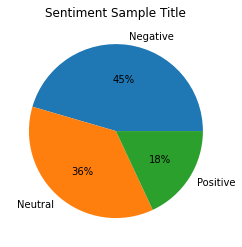

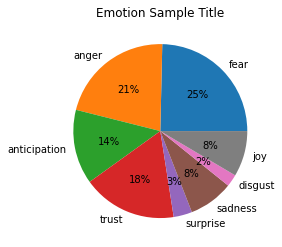

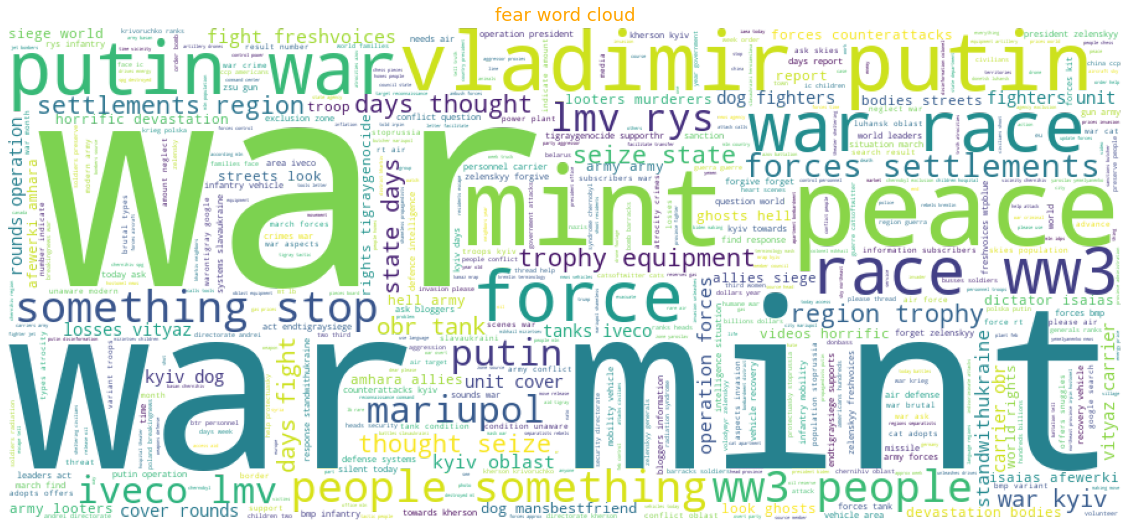

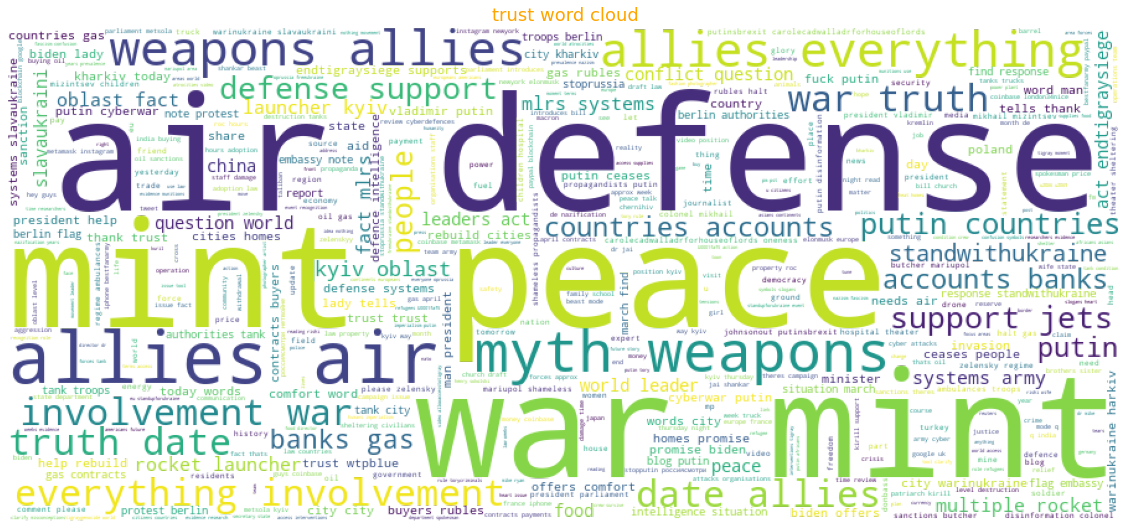

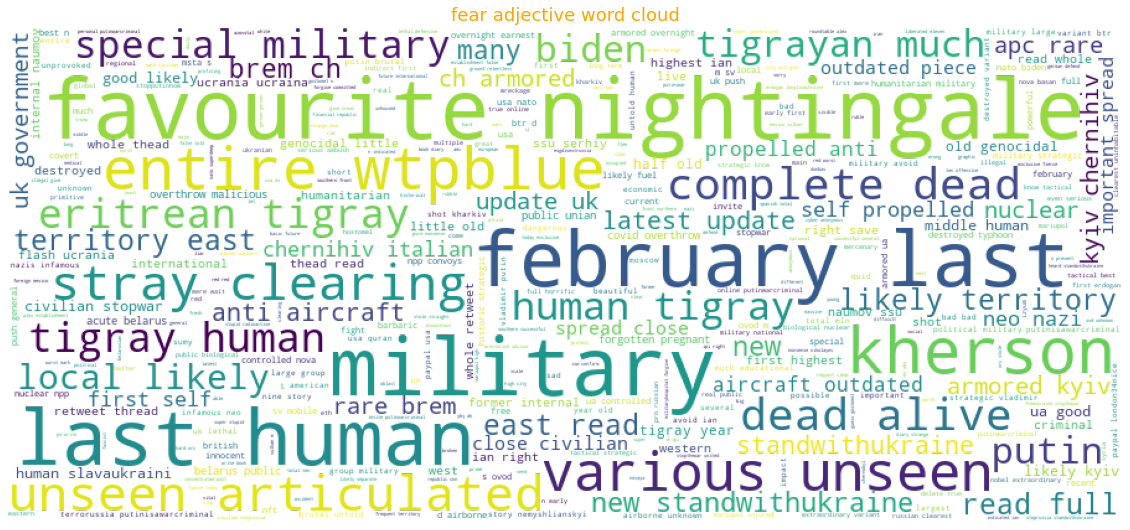

In [52]:
Visulization.createSentimentPieChart(tweets,'Sentiment Sample Title')
Visulization.createEmotionPieChart(tweets,'Emotion Sample Title')
Visulization.createWordCloudForEmotion(tweets,'fear','nouns','fear word cloud')
Visulization.createWordCloudForEmotion(tweets,'trust','nouns','trust word cloud')
Visulization.createWordCloudForEmotion(tweets,'fear','adjectives','fear adjective word cloud')

# res =tweets[0:10]
# res_map = list(map(Visulization.Convert,res['nouns'].values))
# res_join = ' '.join(list(map(' '.join,res_map)))
# print(res_join)
# print(res_map)
# long_string = ' '.join(list(res['nouns'].values))
# print(long_string)
# initial_list = res['nouns'].values[0]
# print(initial_list)
# res = Visulization.Convert(initial_list)
# print(res)
# print(res[0])